In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
t = np.linspace(-10, 10, 100)
# Sigmoid function
sig = 1 / (1 + np.exp(-t))

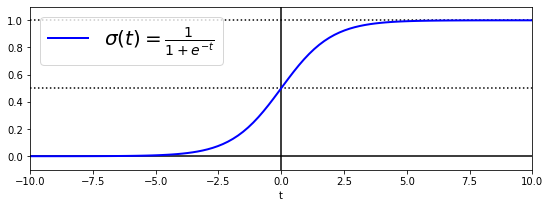

In [3]:
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [4]:
# Loading iris dataset
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [5]:
# Detect the Iris-Virginica type based only on the petal width feature.
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if iris virginica, else 0

In [6]:
log_reg = LogisticRegression(solver = "lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

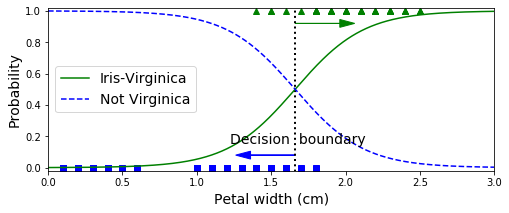

In [7]:
# Model’s estimated probabilities for petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)


plt.plot(X_new, y_proba[:, 1],"g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:, 0],"b--", label = "Not Virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [8]:
decision_boundary

array([1.66066066])

In [9]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [10]:
# logistic Regression with 2 features ( petal width, petal length)

X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver = "lbfgs", C = 10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

In [11]:
y_proba

array([[9.99999998e-01, 1.64270002e-09],
       [9.99999998e-01, 1.72223501e-09],
       [9.99999998e-01, 1.80562087e-09],
       ...,
       [9.09248232e-11, 1.00000000e+00],
       [8.67259597e-11, 1.00000000e+00],
       [8.27207192e-11, 1.00000000e+00]])

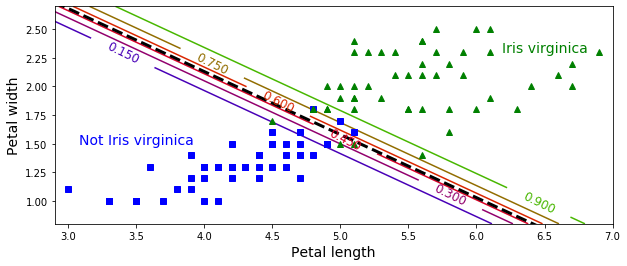

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax

In [13]:
# Classify the iris flowers into all three classes.
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# What type of iris is this?(iris with 5 cm long and 2 cm wide petals)
softmax_reg.predict([[5, 2]])

array([2])

In [15]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Iris-Virginica (class 2) with 94.2% probability (or Iris-Versicolor with 5.8% probability):